In [1]:
import pandas as pd  

In [2]:
df = pd.read_csv("Apple_data.csv")  
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.320431,212818400,0.0,0.0
1,2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.635288,257142000,0.0,0.0
2,2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.637508,263188400,0.0,0.0
3,2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,23.968956,160423600,0.0,0.0
4,2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,24.889900,237458000,0.0,0.0


In [3]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2516 non-null   object 
 1   Open          2516 non-null   float64
 2   High          2516 non-null   float64
 3   Low           2516 non-null   float64
 4   Close         2516 non-null   float64
 5   Adj Close     2516 non-null   float64
 6   Volume        2516 non-null   int64  
 7   Dividends     2516 non-null   float64
 8   Stock Splits  2516 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 177.0+ KB
None


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df = df[['Close']]

In [7]:
df.head()

,Close
Date,
2015-01-02 00:00:00-05:00,27.332500
2015-01-05 00:00:00-05:00,26.562500
2015-01-06 00:00:00-05:00,26.565001
2015-01-07 00:00:00-05:00,26.937500
2015-01-08 00:00:00-05:00,27.972500


In [8]:
print(df.isnull().sum())

Close    0
dtype: int64


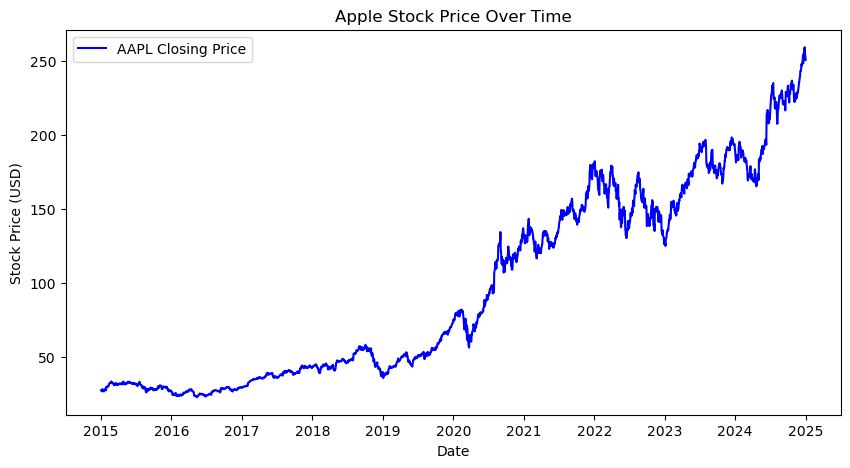

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label="AAPL Closing Price", color="blue")
plt.title("Apple Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    result = adfuller(series)
    print("ADF Test Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] <= 0.05:
        print("The data is stationary.")
    else:
        print("The data is NOT stationary.")

check_stationarity(df['Close'])

ADF Test Statistic: 0.7277025813295483
p-value: 0.99037481330067
The data is NOT stationary.


In [11]:
# first difference of the series
df_diff = df['Close'].diff().dropna()

In [12]:
check_stationarity(df_diff)

ADF Test Statistic: -15.833994606078944
p-value: 9.867827785979667e-29
The data is stationary.


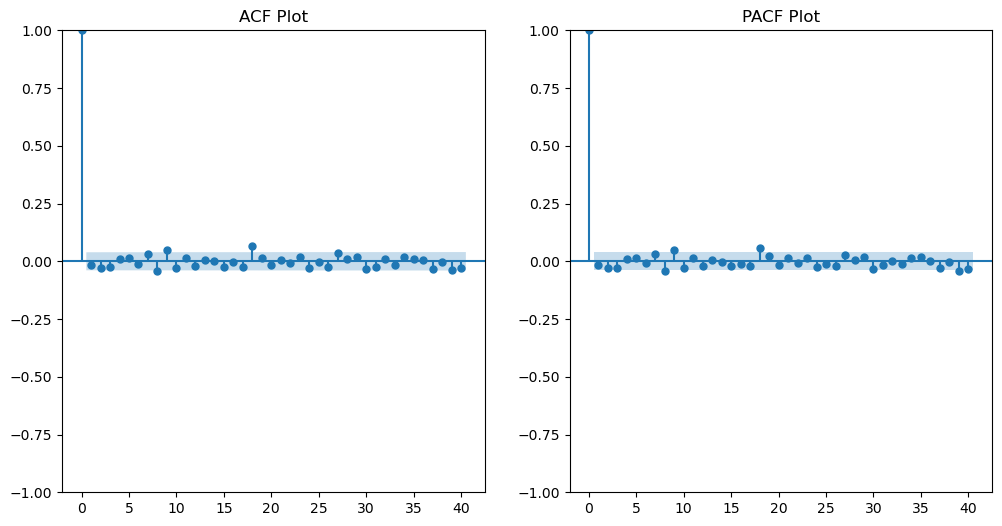

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced series
plt.figure(figsize=(12,6))

plt.subplot(121)
plot_acf(df_diff, ax=plt.gca(), lags=40)
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df_diff, ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.show()

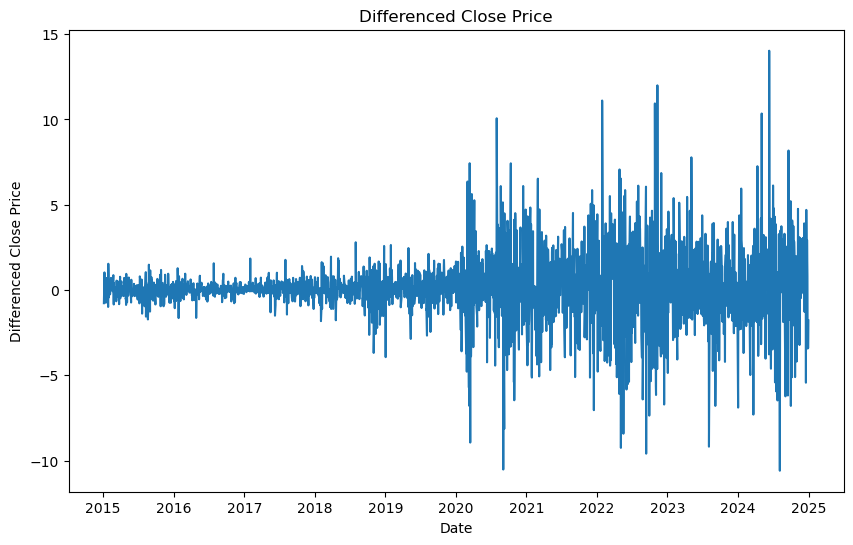

In [15]:
# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(df_diff)
plt.title('Differenced Close Price')
plt.xlabel('Date')
plt.ylabel('Differenced Close Price')
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model = ARIMA(df['Close'], order=(2, 1, 2))
model_fit = model.fit()

/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/admin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
print(df.index)

Index([2015-01-02 00:00:00-05:00, 2015-01-05 00:00:00-05:00,
       2015-01-06 00:00:00-05:00, 2015-01-07 00:00:00-05:00,
       2015-01-08 00:00:00-05:00, 2015-01-09 00:00:00-05:00,
       2015-01-12 00:00:00-05:00, 2015-01-13 00:00:00-05:00,
       2015-01-14 00:00:00-05:00, 2015-01-15 00:00:00-05:00,
       ...
       2024-12-17 00:00:00-05:00, 2024-12-18 00:00:00-05:00,
       2024-12-19 00:00:00-05:00, 2024-12-20 00:00:00-05:00,
       2024-12-23 00:00:00-05:00, 2024-12-24 00:00:00-05:00,
       2024-12-26 00:00:00-05:00, 2024-12-27 00:00:00-05:00,
       2024-12-30 00:00:00-05:00, 2024-12-31 00:00:00-05:00],
      dtype='object', name='Date', length=2516)


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2516
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5260.603
Date:                Wed, 05 Mar 2025   AIC                          10531.205
Time:                        22:25:21   BIC                          10560.356
Sample:                             0   HQIC                         10541.785
                               - 2516                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7650      0.356      2.148      0.032       0.067       1.463
ar.L2         -0.5330      0.281     -1.898      0.058      -1.083       0.017
ma.L1         -0.7776      0.360     -2.158      0.031      -1.484      -0.071
ma.L2          0.5132      0.290      1.767      0.077      -0.056       1.082
sigma2         3.8401      0.055     69.938      0.000       3.733       3.948
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3814.37
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):              36.13   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""